# Simulating Neuro-Computational feature from Izhikevich model

*Author: Vincenzo Gargano*

**2 Variables**
$(u,w)$: $u$ is the fast voltage variable (n-shaped nullcline) and $w$ is the slow recovery variable (sigmoidal nullcline)

**5 Parameters:** 
$(a, b, I)$: Determining the behavior of the system
$(c, d)$: Affecting after-spike behavior

**General Equations:**
$\frac{du}{dt} = I + u^2 - w$ 
$\frac{dw}{dt} = a(bu - w)$

**Paper Equations:**
$\frac{du}{dt} = 0.04*u^2$ + 5*u + 140 - w + I
$\frac{dw}{dt} = a(bu - w)$

**Reset condition**
$\text{if}: u \geq 30$,
$u \leftarrow c$, $w \leftarrow w + d$


In [1]:
import numpy as np
from izhikevich_model import *
import matplotlib.pyplot as plt

In [159]:
T = 2000
T1 = 200
I = np.zeros(T)

current_input = 14

#I = np.full(T, 20)

# current is 0 the first 200 and 14 until the end
I[:T1] = 0
I[T1:] = np.full(T-T1, current_input)

# make current I go from -20 to 0
#I[:T//2] = -20 + 20*np.arange(T//2)/T

# cosine current
#I = 20*np.cos(np.arange(T)/T*40*np.pi)

izhikevich = IzhikevichModel(a = 0.02, b = 0.2, c = -65, d = 6, I = I, u = -70, w = 0.2*-70)

#izhikevich_bursting = IzhikevichModel()

In [160]:
# plot the behavior of the model
t, u, w, spikes = izhikevich.simulate(T=T, I=I)

## Showing phase portrait





In [161]:
def draw_phase_portrait(variables_after_simulation, title):
    """Draw the phase portrait of the Izhikevich model

    Args:
        variables_after_simulation (tuple): Tuple containing the variables after the simulation
    """
    u, w = variables_after_simulation
    
    # normalize u and w
    #u = (u - np.min(u)) / (np.max(u) - np.min(u))
    
    # last point
    u_last = u[-1]
    w_last = w[-1]

    plt.plot(u, w)
    # draw red dot for last value   
    plt.plot(u_last, w_last, 'ro')
    plt.title(title)
    plt.xlabel('u')
    plt.ylabel('w')
    
    plt.show() 

In [162]:
def draw_spiking_behaviour(t, u, I, spikes, T1):
    """
    Draw the spiking behavior of the Izhikevich model
    
    Args:
        t (np.array): time array
        u (np.array): membrane potential array
        I (np.array): current array
        T1 (int): Time at which current changes from 0 to some input
    """ 
    plt.figure(figsize=(20, 10))
    
    plt.subplot(1, 1, 1)
    
    plt.plot(t, u, label='u')
   
    # show current below the plot
    
    # change behaviour of plot current below if I is a list
    
    # check if I is a list
    if I[T1] == I[T1-1]:
        # at each step go -100
        # create a vector with -100 same lengh as I
        graphical_fix_vector = np.ones(len(I)) * -50
        plt.plot(t, I-graphical_fix_vector, label = 'I')
    else:
        plt.plot(t, I-100, label='I')
    
    
    #plt.plot([0, T1, T1, 100], [-90 , -90, -80, -80], 'k--')
    
    plt.axis('off')
    
    plt.show()
    

(-9.995000000000001, 209.895, -106.5, 36.5)

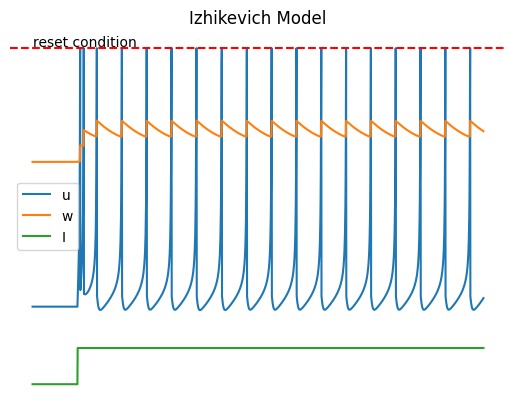

In [163]:
# plot the behavior of the model
# create subplot

plt.plot(t, u, label='u')
plt.plot(t, w, label='w')
plt.xlabel('Time (ms)') 
# red horizontal line at 30mV and text saying reset condition
plt.axhline(y=30, color='r', linestyle='--')
plt.text(0, 31, 'reset condition')

# plot current
plt.plot(t, I-100, label='I')

plt.ylabel('Voltage (mV)')
plt.legend()
plt.title('Izhikevich Model')

plt.axis('off')

# Results and Neuro-Comp Features 

In [143]:
# Current

T = 500
T1 = 20
I = np.zeros(T)

current_input = 14

#I = np.full(T, 20)

# current is 0 the first 200 and 14 until the end
I[:T1] = 0
I[T1:] = np.full(T-T1, current_input)

## 1. Tonic Spiking

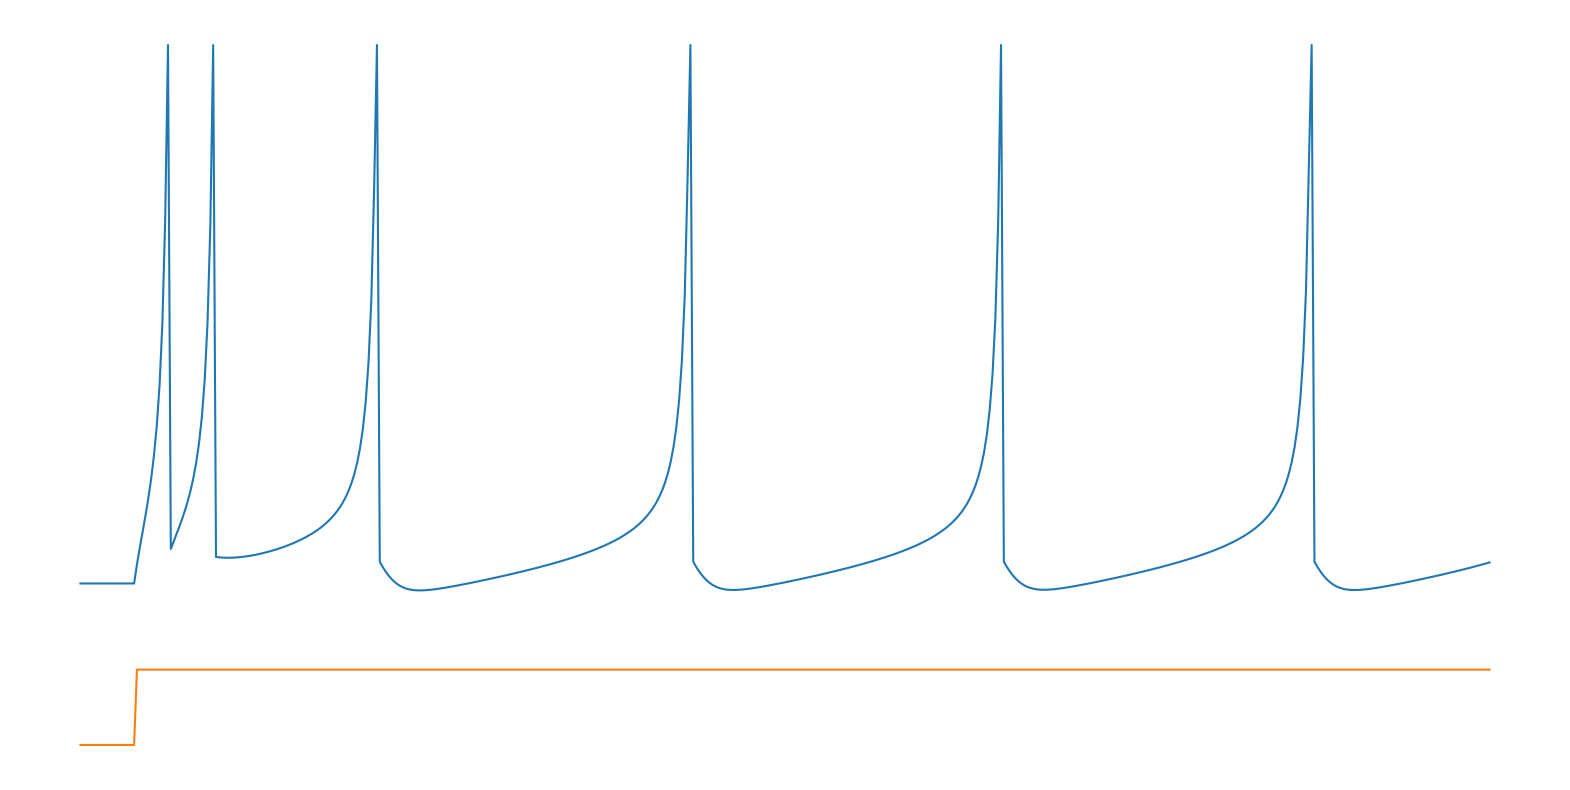

In [144]:
tonic_spiking = IzhikevichModel(a = 0.02, b = 0.2, c = -65, d = 6, I = I, u = -70, w = 0.2*-70)

# Simulate the model
t, u, w, spikes = tonic_spiking.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, spikes, T1)

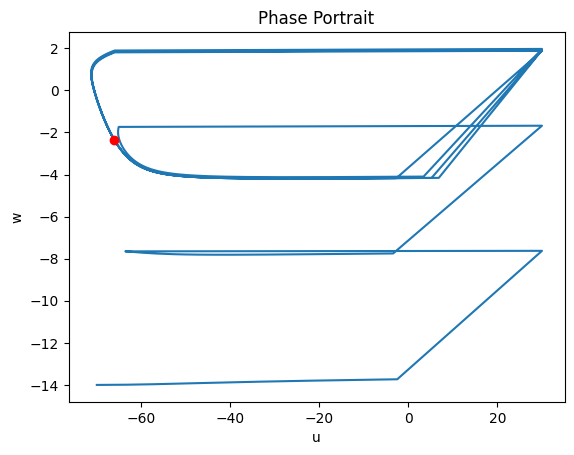

In [145]:
draw_phase_portrait((u, w), 'Phase Portrait')

# 2. Phasic Spiking

In [62]:
# Current

T = 500
T1 = 20
I = np.zeros(T)

current_input = 0.5

#I = np.full(T, 20)

# current is 0 the first 200 and 14 until the end
I[:T1] = 0
I[T1:] = np.full(T-T1, current_input)

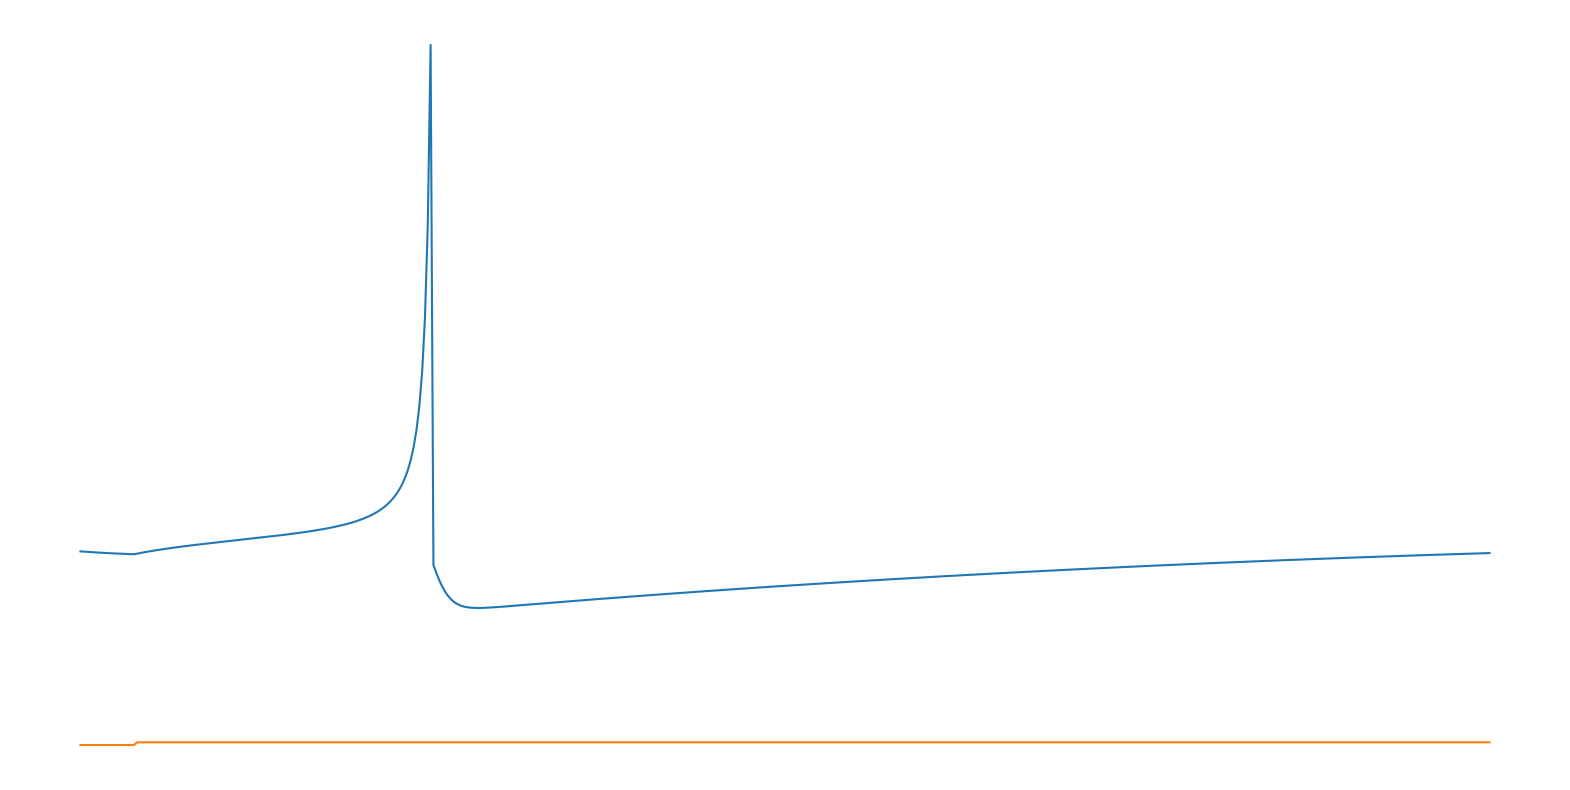

In [63]:
phasic_spike = IzhikevichModel(a = 0.02, b = 0.25, c = -65, d = 6, I = I, u = -64, w = 0.25*-64)

# Simulate the model
t, u, w, spikes = phasic_spike.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, spikes, T1)

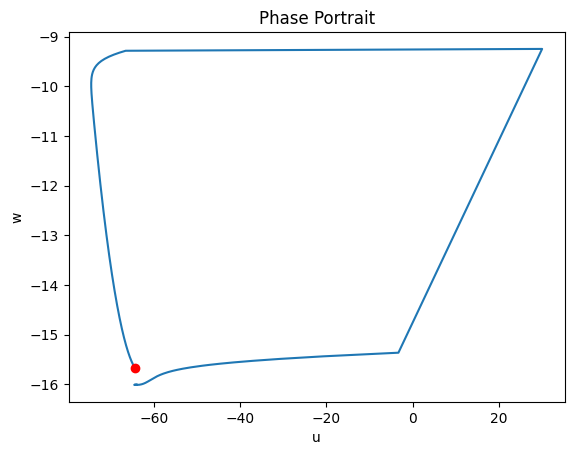

In [64]:
draw_phase_portrait((u, w), 'Phase Portrait')

## 3. Tonic Bursting

In [68]:
# Current

T = 500
T1 = 20
I = np.zeros(T)

current_input = 15

#I = np.full(T, 20)

# current is 0 the first 200 and 14 until the end
I[:T1] = 0
I[T1:] = np.full(T-T1, current_input)

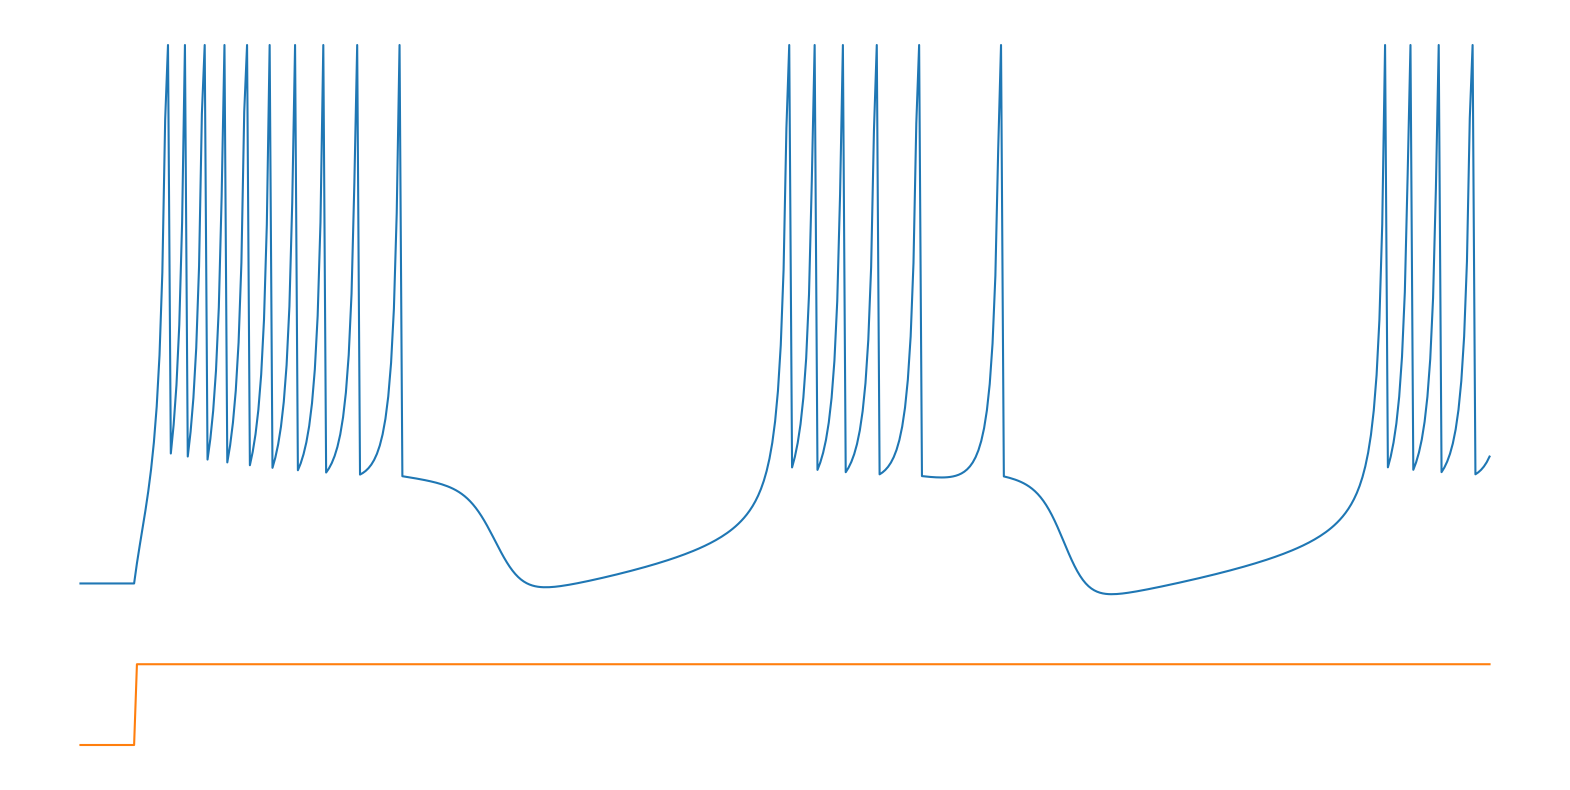

In [69]:
tonic_bursting = IzhikevichModel(a = 0.02, b = 0.2, c = -50, d = 2, I = I, u = -70, w = 0.2*-70)

# Simulate the model
t, u, w, spikes = tonic_bursting.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, spikes, T1)

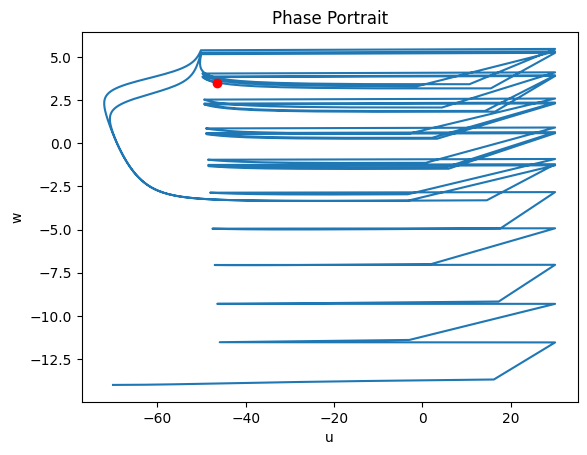

In [70]:
draw_phase_portrait((u, w), 'Phase Portrait')

# 4. Phasic Bursting

In [165]:
# Current

T = 500
T1 = 20
I = np.zeros(T)

current_input = 0.6

#I = np.full(T, 20)

# current is 0 the first 200 and 14 until the end
I[:T1] = 0
I[T1:] = np.full(T-T1, current_input)

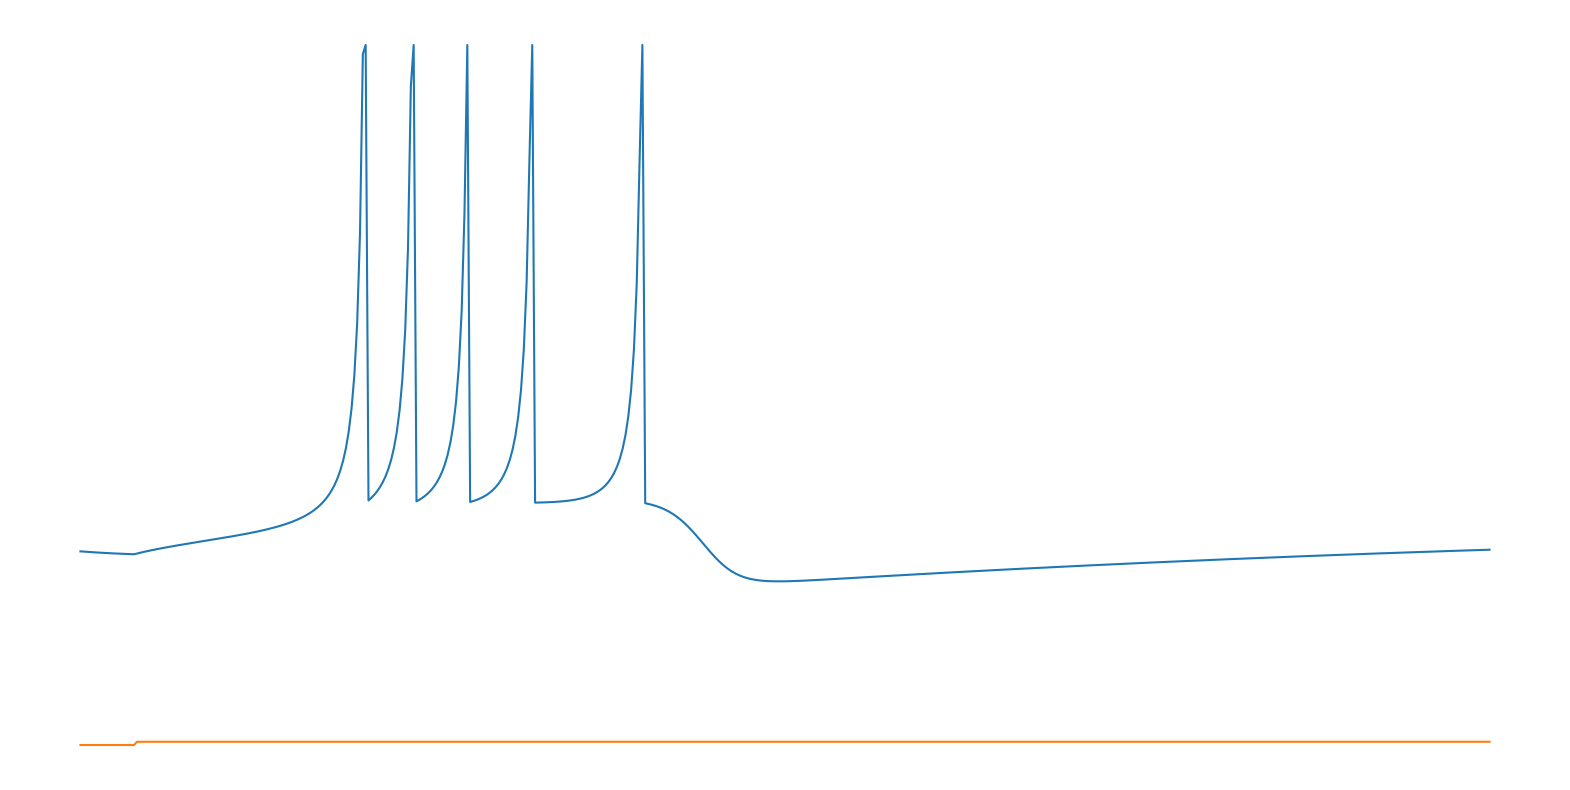

In [166]:
phasic_bursting = IzhikevichModel(a = 0.02, b = 0.25, c = -55, d = 0.05, I = I, u = -64, w = 0.25*-64)

# Simulate the model
t, u, w, spikes = phasic_bursting.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, spikes, T1)

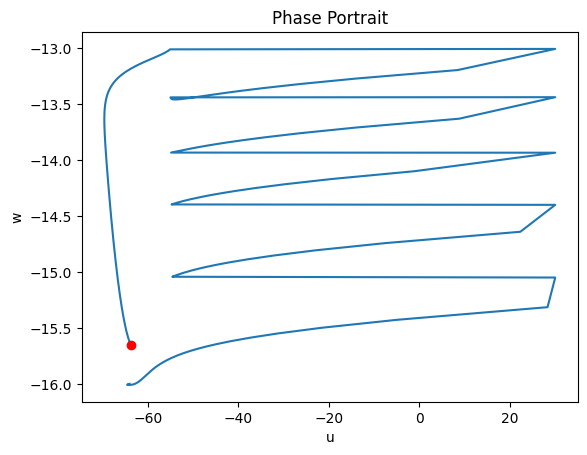

In [167]:
draw_phase_portrait((u, w), 'Phase Portrait')

# 5. Mixed Mode

In [168]:
# Current

T = 500
T1 = 20
I = np.zeros(T)

current_input = 10

#I = np.full(T, 20)

# current is 0 the first 200 and 14 until the end
I[:T1] = 0
I[T1:] = np.full(T-T1, current_input)

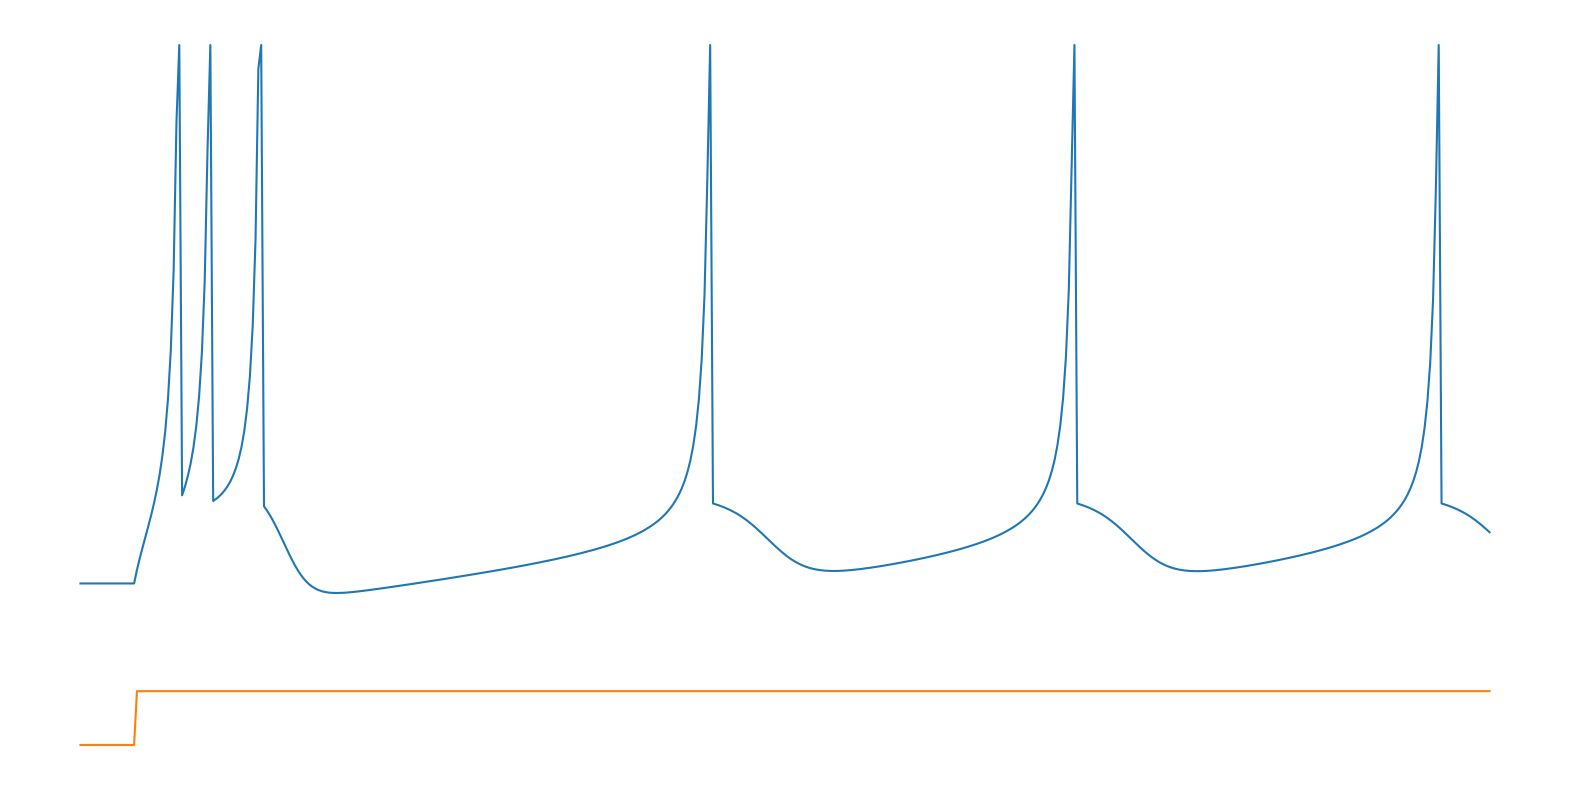

In [169]:
mixed_mode = IzhikevichModel(a = 0.02, b = 0.2, c = -55, d = 4, I = I, u = -70, w = 0.2*-70)

# Simulate the model
t, u, w, spikes = mixed_mode.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, spikes, T1)

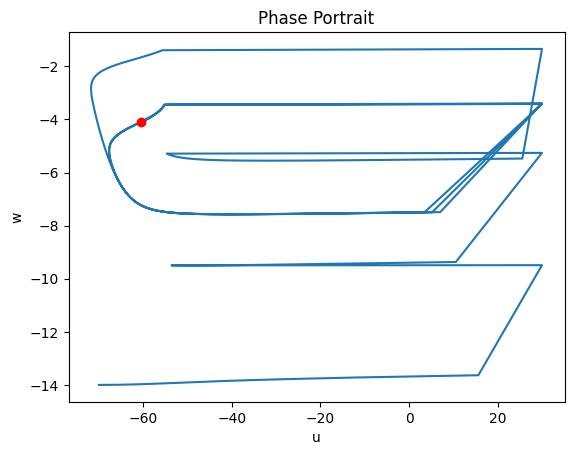

In [170]:
draw_phase_portrait((u, w), 'Phase Portrait')

# 6. Spike Frequency Adaptation


In [171]:
# Current

T = 500
T1 = 20
I = np.zeros(T)

current_input = 30

#I = np.full(T, 20)

# current is 0 the first 200 and 14 until the end
I[:T1] = 0
I[T1:] = np.full(T-T1, current_input)

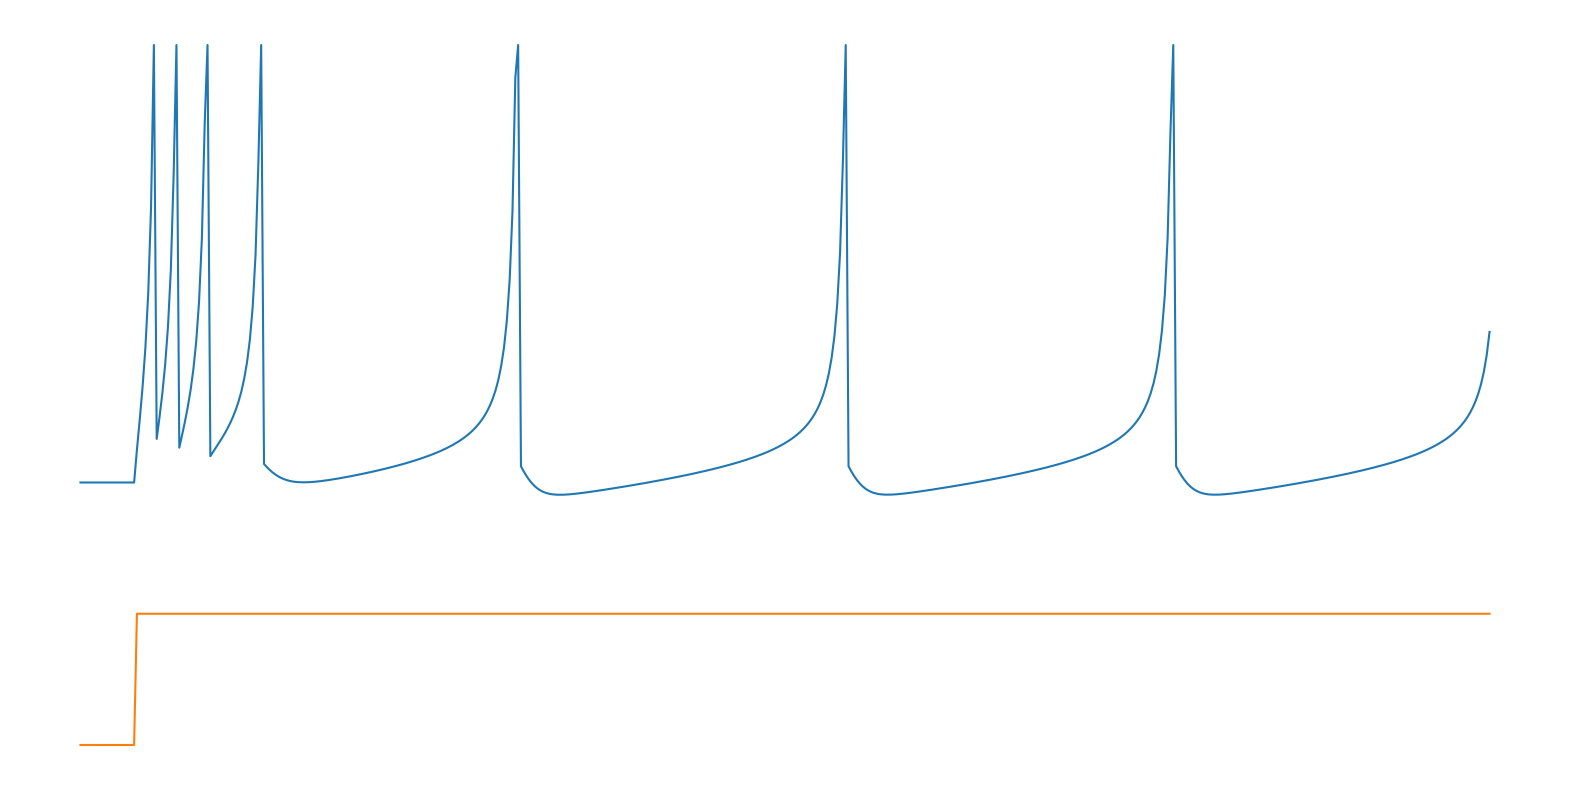

In [172]:
spike_frequency_adaptation = IzhikevichModel(a = 0.01, b = 0.2, c = -65, d = 8, I = I, u = -70, w = 0.2*-70)

# Simulate the model
t, u, w, spikes = spike_frequency_adaptation.simulate(T=T, I=I)

# This value is only used because of the sovrapposition in the plot
graphical_fix_value = 30

draw_spiking_behaviour(t, u, I-graphical_fix_value, spikes, T1)

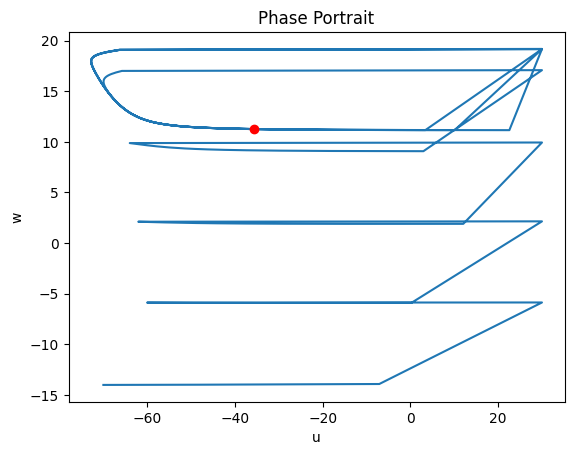

In [173]:
draw_phase_portrait((u, w), 'Phase Portrait')

# 7. Resonator

In [174]:
# Current

T = 500
T1 = 20
T2 = T1 + 20    
T3 = 0.7 * 500
T4 = T3 + 40

I = []

current_input = 0.65

# construct a vector only activates in the time t1-t2 then zero then 
# like this  I = 0.65 if ((t>T1) and (t < T1+4)) or ((t>T2) and (t < T2+4)) or ((t>T3) and (t < T3+4)) or ((t>T4) and (t < T4+4))  else 0

# create a support variable t to cycle in order to create the vector
t = np.arange(0, T, 0.25)

for i in range(len(t)):
    if (t[i] > T1 and t[i] < T1+4) or (t[i] > T2 and t[i] < T2+4) or (t[i] > T3 and t[i] < T3+4) or (t[i] > T4 and t[i] < T4+4):
        I.append(current_input)
    else:
        I.append(0)



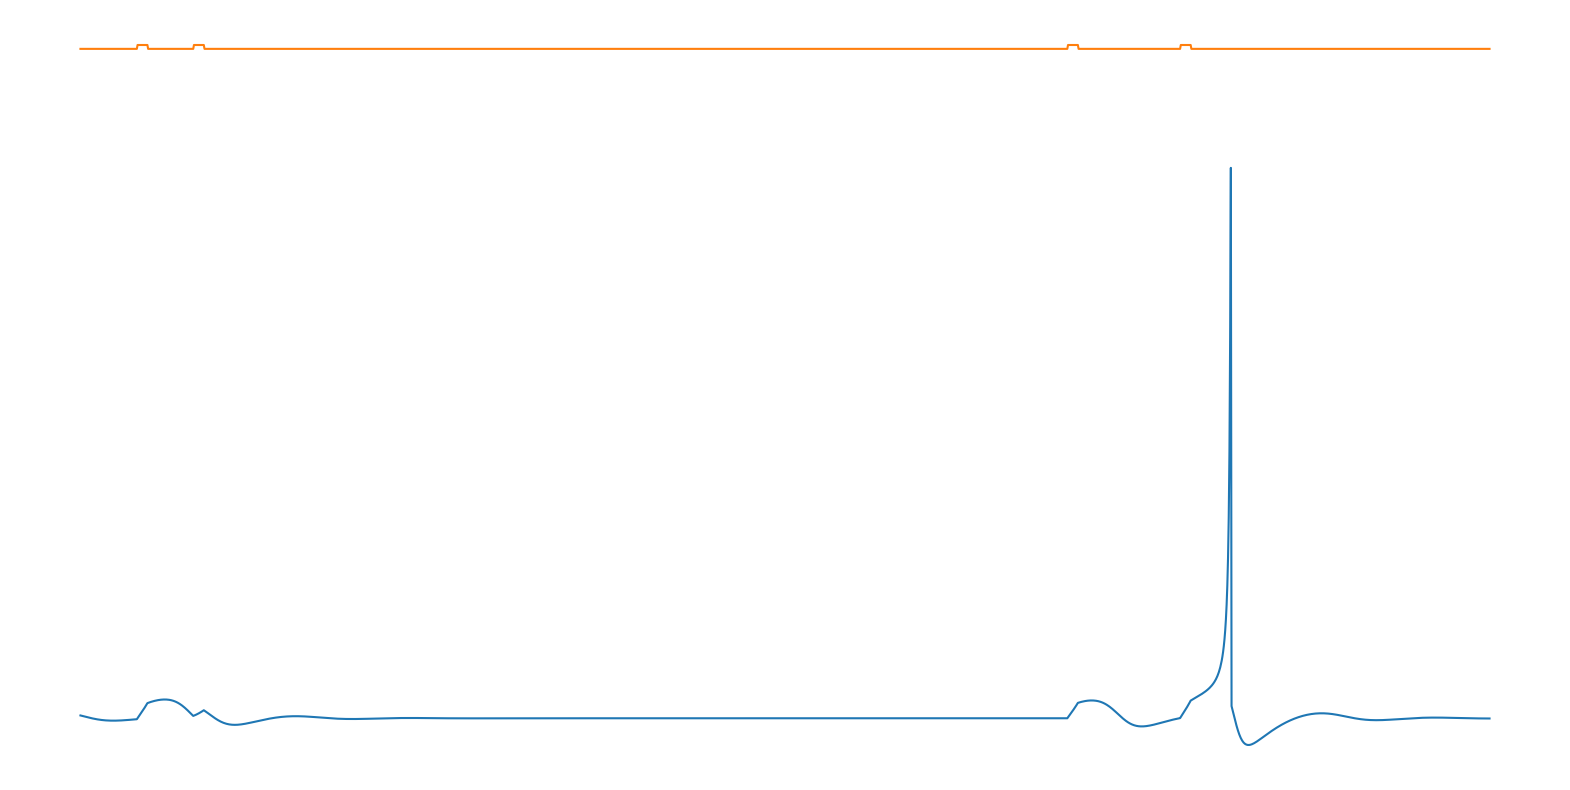

In [175]:
resonator = IzhikevichModel(a = 0.1, b = 0.26, c = -60, d = -1, u = -62, w = 0.26*-62, I = I)

# Simulate the model
t, u, w, spikes = resonator.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, T1=T1, spikes = spikes)

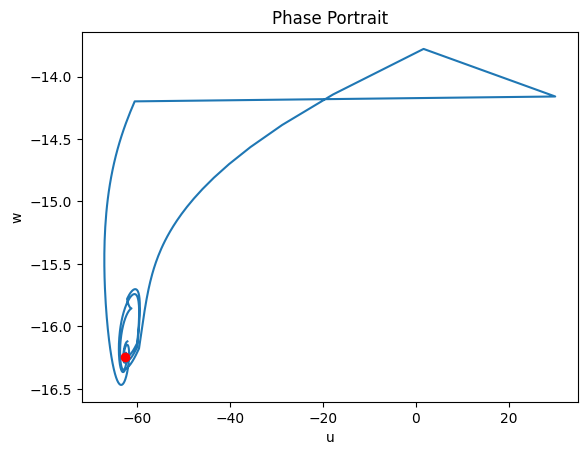

In [176]:
draw_phase_portrait((u, w), 'Phase Portrait')